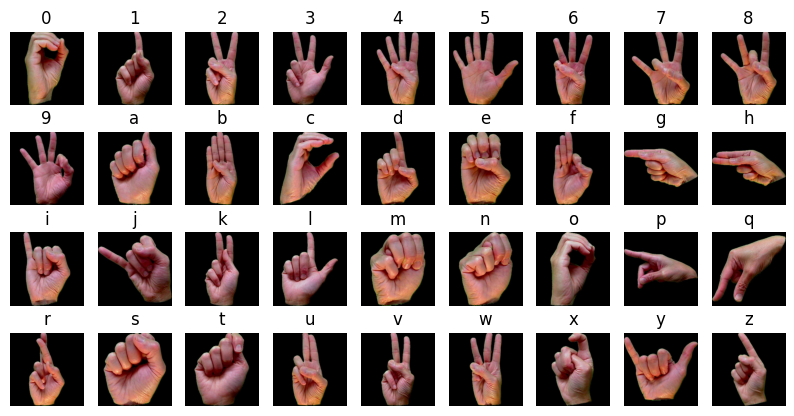

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = "./asl_dataset/"

fig, ax = plt.subplots(4, 9, figsize=(10, 5))
img_classes = [os.path.join(path, im) for im in os.listdir(path)]
ax = ax.flatten()

data, label = [], []

for i, img_class in enumerate(img_classes):
    img = os.listdir(img_class)[np.random.randint(0, 10)]
    img_path = os.path.join(img_class, img)
    image = cv2.imread(img_path)
    ax[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[i].set_title(os.path.basename(img_class))
    ax[i].axis('off')

    # Przetwarzanie obrazu
    img = cv2.resize(image, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    data.append(img)
    label.append(os.path.basename(img_class))

plt.show()

data = np.array(data)
label = np.array(label)
label = label.astype(str)



In [26]:
import cv2 as cv
import math as m

path = "./asl_dataset/"

labels = os.listdir(path)
X_train = []
y_train = []
X_valid = []
y_valid = []

for i, label in enumerate(labels):
    folderpath = path + label + '/'
    for file in os.listdir(folderpath)[0:m.floor(len(os.listdir(folderpath))*0.8)]:
        img_path = folderpath + file
        img = cv.imread(img_path)
        img = cv.resize(img, (224, 224))
        X_train.append(np.array(img))
        y_train.append(i)
    for file in os.listdir(folderpath)[m.floor(len(os.listdir(folderpath))*0.8):]:
        img_path = folderpath + file
        img = cv.imread(img_path)
        img = cv.resize(img, (224, 224))
        X_valid.append(np.array(img))
        y_valid.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(2012, 224, 224, 3)
(2012,)
(503, 224, 224, 3)
(503,)
